# Binary Yukawa Mixture Simulation

In [1]:
# Import the usual libraries
%pylab
%matplotlib inline
import os
plt.style.use('MSUstyle')
# Import sarkas
from sarkas.processes import Simulation, PostProcess, PreProcess
from sarkas.tools.transport import TransportCoefficient

# Create the file path to the YAML input file
example_directory = os.path.join('..',
                                 os.path.join('sarkas','examples'))

input_file_name = os.path.join(example_directory, 'ybim_mks_pp.yaml')

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


## Pre Simulation Testing

In [2]:
preproc = PreProcess(input_file_name)
preproc.setup(read_yaml=True)








     _______.     ___      .______       __  ___      ___           _______.
    /       |    /   \     |   _  \     |  |/  /     /   \         /       |
   |   (----`   /  ^  \    |  |_)  |    |  '  /     /  ^  \       |   (----`
    \   \      /  /_\  \   |      /     |    <     /  /_\  \       \   \    
.----)   |    /  _____  \  |  |\  \----.|  .  \   /  _____  \  .----)   |   
|_______/    /__/     \__\ | _| `._____||__|\__\ /__/     \__\ |_______/    
                                                                            


An open-source pure-python molecular dynamics code for non-ideal plasmas.



======================= Simulation ==========================

Job ID:  CO_mks_pp
Job directory:  Simulations/CO_mks_pp
Equilibration dumps directory:  Simulations/CO_mks_pp/Equilibration/dumps
Production dumps directory:  Simulations/CO_mks_pp/Production/dumps

Units:  mks
Total No. of particles =  1000

Particle Species:
No. of species =  2
Species 1 : C
	Species ID: 0
	

In [3]:
preproc.run(timing=True, loops = 30, postprocessing=True)

Time of PP acceleration calculation averaged over 30 steps: 
0 min 0 sec 15 msec 284 usec 831 nsec 


Running 30 equilibration and production steps to estimate simulation times



  0%|          | 0/30 [00:00<?, ?it/s]

Time of a single equilibration step averaged over 30 steps: 
0 min 0 sec 38 msec 271 usec 174 nsec 



  0%|          | 0/30 [00:00<?, ?it/s]

Time of a single production step averaged over 30 steps: 
0 min 0 sec 17 msec 166 usec 383 nsec 



----------------- Total Estimated Times -----------------------

Equilibration Time: 0 hrs 3 min 11 sec

Production Time: 0 hrs 8 min 34 sec

Total Run Time: 0 hrs 11 min 46 sec


===================== Post Processing ============================

Radial Distribution Function:
No. bins = 250
dr = 0.0240 a_ws = 1.1817e-12 [m]
Maximum Distance (i.e. potential.rc)= 6.0000 a_ws = 2.9542e-10 [m]

Static Structure Factor:
No. of ka harmonics = n_x, n_y, n_z = 10, 10, 10
No. of ka values to calculate = 1330
Smallest wavevector k_min = 3.9 / N^(1/3)
k_min = 0.3898 / a_ws = 1.2599e+09 [1/m]
Largest wavevector k_max = k_min * sqrt( n_x^2 + n_y^2 + n_z^2)
k_max = 6.7511 / a_ws = 2.1822e+10 [1/m]

Dynamic Structure Factor:
Frequency Constants
	No. of slices = 2
	No. steps per slice = 3000
	No. dumps per slice = 600
	Frequency step dw = 2 pi (no_slices * prod_dump_step)/(production_steps * dt)
	dw = 

In [4]:
sim = Simulation(input_file_name)
sim.setup(read_yaml=True)
sim.run()







  _________             __                   
 /   _____/____ _______|  | _______    ______
 \_____  \\__  \\_  __ \  |/ /\__  \  /  ___/
 /        \/ __ \|  | \/    <  / __ \_\___ \ 
/_______  (____  /__|  |__|_ \(____  /____  >
        \/     \/           \/     \/     \/ 


An open-source pure-python molecular dynamics code for non-ideal plasmas.



======================= Simulation ==========================

Job ID:  CO_mks_pp
Job directory:  Simulations/CO_mks_pp
Equilibration dumps directory:  Simulations/CO_mks_pp/Equilibration/dumps
Production dumps directory:  Simulations/CO_mks_pp/Production/dumps

Units:  mks
Total No. of particles =  1000

Particle Species:
No. of species =  2
Species 1 : C
	Species ID: 0
	No. of particles = 500 
	Number density = 1.000000e+30 [N/m^3]
	Mass = 2.008986e-26 [kg]
	Charge = 9.613060e-19 [C]
	Temperature = 1.020000e+05 [K]
Species 2 : O
	Species ID: 1
	No. of particles = 500 
	Number density = 1.000000e+30 [N/m^3]
	Mass = 2.676195e-26 [k

  0%|          | 0/5000 [00:00<?, ?it/s]


Equilibration Time: 0 hrs 1 min 25 sec

------------- Production -------------


  0%|          | 0/30000 [00:00<?, ?it/s]


Production Time: 0 hrs 9 min 20 sec

Total Time: 0 hrs 10 min 45 sec


In [5]:
postproc = PostProcess(input_file_name)
postproc.setup(read_yaml=True)

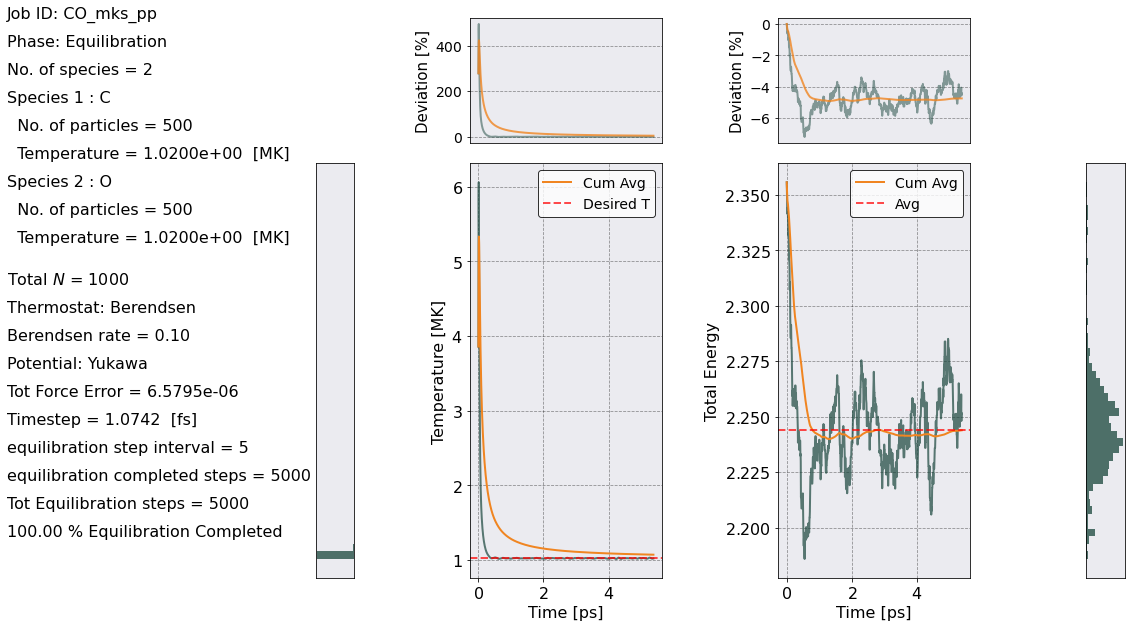

In [6]:
postproc.therm.setup(postproc.parameters)
postproc.therm.temp_energy_plot(postproc,phase="equilibration")

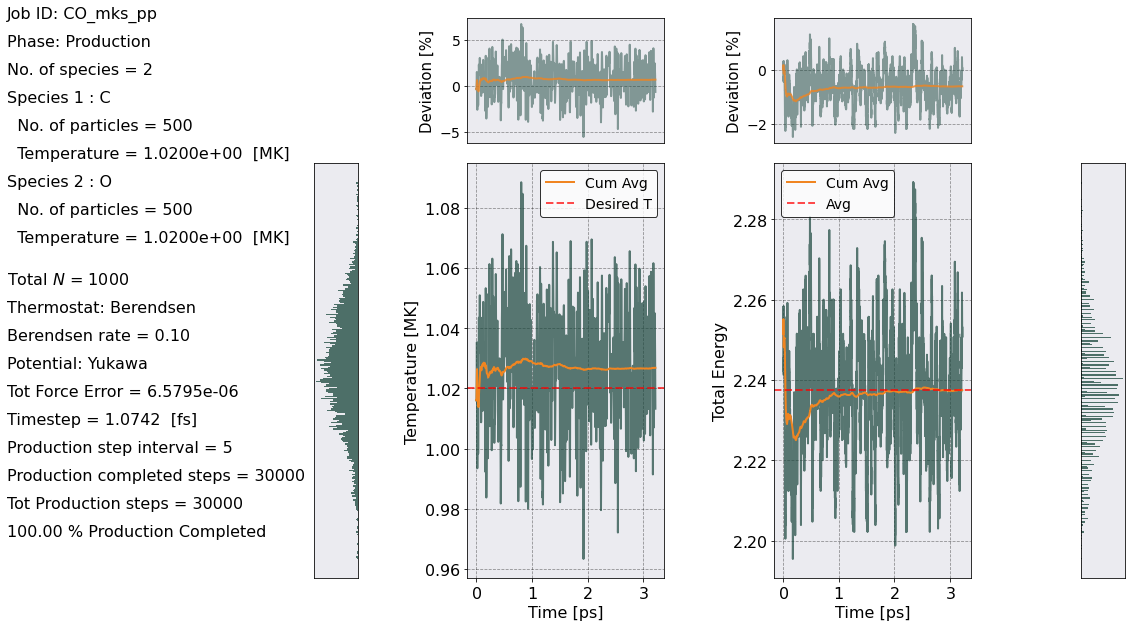

In [7]:
postproc.therm.temp_energy_plot(postproc, phase = 'Production')

In [8]:
postproc.dsf.setup(postproc.parameters)
postproc.dsf.compute()

Calculating n(k,t).


  0%|          | 0/3000 [00:00<?, ?it/s]

Calculating n(k,t).


  0%|          | 0/3000 [00:00<?, ?it/s]

<AxesSubplot:xlabel='Frequencies'>

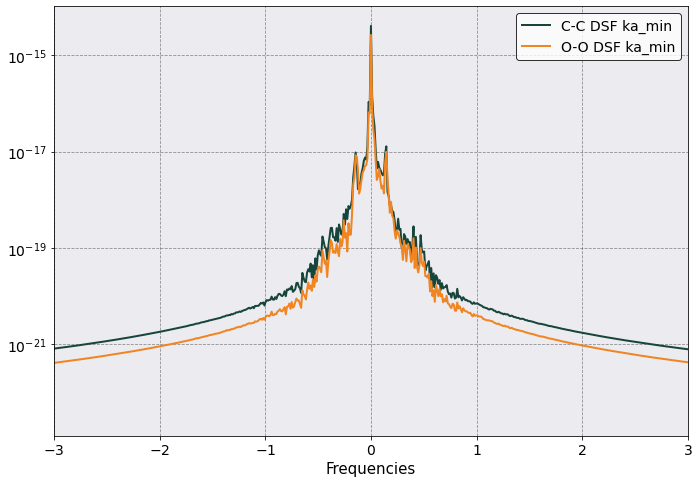

In [9]:
postproc.dsf.plot(normalization= postproc.dsf.total_plasma_frequency, 
                  y = ['C-C DSF ka_min', 'O-O DSF ka_min'],
                 logy = True,
                 xlim = (-3, 3))

In [10]:
postproc.ssf.setup(postproc.parameters)
postproc.ssf.compute()

Calculating S(k)


  0%|          | 0/2 [00:00<?, ?it/s]

/Users/lucianogsilvestri/opt/anaconda3/envs/sarkas/lib/python3.7/site-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


<AxesSubplot:xlabel='$ka$'>

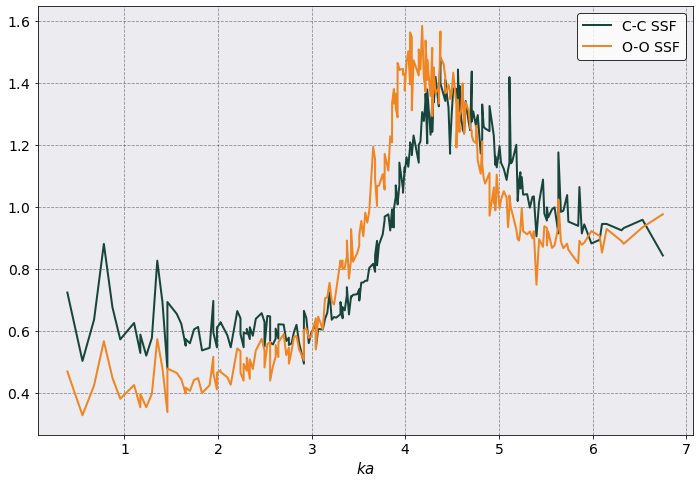

In [11]:
postproc.ssf.plot(y = ['C-C SSF','O-O SSF'],
                 xlabel = r'$ka$')